## Εθνικό Μετσόβιο Πολυτεχνείο 
## Σχολή Ηλεκτρολόγων Μηχανικών & Μηχανικών Υπολογιστών


### Μάθημα: Στοχαστικές διαδικασίες
### Διδάσκων: Μιχαήλ Λουλάκης
### Ακαδημαϊκό έτος: 2017-2018


### Ιωάννης Κ. Γεωργακόπουλος
### Α.Μ.: 03111512


# 3η Εργαστηριακή Άσκηση

Σε αυτή την άσκηση θα εξοικειωθούμε με την κατασκευή διαγραμμάτων χρησιμοποιώντας τη βιβλιοθήκη matplotlib.

Αρχικά φορτώνουμε τις βιβλιοθήκες που θα χρησιμοποιήσουμε.


In [1]:
import numpy as np  # numerical computations library. We will call it np in our code
import matplotlib.pyplot as plt  # library for plotting. We will call it plt in our code

# to plot the results in the notebook:
%matplotlib inline

Παρακάτω παραθέτουμε το κομμάτι κώδικα για το πρόβλημα με το τέννις, τροποποιημένο, ώστε να μπορούμε να εισάγουμε την πιθανότητα $p$ ως παράμετρο της συνάρτησης MonteCarlo.

In [2]:
import random
random.seed(11512)  # for reproducibility
from simple_markov_chain_lib import markov_chain


def Monte_Carlo_Tennis(p, N, steps, print_results): #Προσθέτουμε την παράμετρο p στη συνάρτηση
    
    # A dictionary for the initial distibution. 
    # We prescribe the initial distribution
    init_probs = {' 0 -  0': 1.0} 
 
    # A dictionary for the transition probability  matrix. 
    # Every state-key corresponds to a list with tuples of (Next_State,Probability) 
    markov_table = {
        ' 0 -  0': {'15 -  0': p, ' 0 - 15': 1-p},
        ' 0 - 15': {'15 - 15': p, ' 0 - 30': 1-p},
        ' 0 - 30': {'15 - 30': p, ' 0 - 40': 1-p},
        ' 0 - 40': {'15 - 40': p, ' GameB ': 1-p},
        '15 -  0': {'30 -  0': p, '15 - 15': 1-p},
        '15 - 15': {'30 - 15': p, '15 - 30': 1-p},
        '15 - 30': {' Deuce ': p, '15 - 40': 1-p},
        '15 - 40': {'  AdvB ': p, ' GameB ': 1-p},
        '30 -  0': {'40 -  0': p, '30 - 15': 1-p},
        '30 - 15': {'40 - 15': p, ' Deuce ': 1-p},
        '40 -  0': {' GameA ': p, '40 - 15': 1-p},
        '40 - 15': {' GameA ': p, '  AdvA ': 1-p},
        ' Deuce ': {'  AdvA ': p, '  AdvB ': 1-p},
        '  AdvA ': {' GameA ': p, ' Deuce ': 1-p},
        '  AdvB ': {' Deuce ': p, ' GameB ': 1-p},
        ' GameA ': {' GameA ': 1},
        ' GameB ': {' GameB ': 1}
    }
     
    # Ok... we are ready now
    # Let's construct a Markov Chain. So let's call the constructor
    mc = markov_chain(markov_table, init_probs)
    
    
    
    ## Simulation
    counter = 0  # to count the number of times the event {X= GameA} occurs
    for i in range(N):
        mc.start()         # new experiment
        rem_steps = steps  #βήματα που απομένουν
        while (((mc.running_state != ' GameA ') and (mc.running_state != ' GameB ')) and rem_steps > 0):  
            mc.move()
            rem_steps -= 1
        if mc.running_state == ' GameA ':  counter += 1

    phat = counter / N
    if print_results == 1: #Εαν θέλω να έχω εποπτεία στα αποτελέσματα
        print(
            """
            We executed the markov chain {0} times  
            and we captured the running state in state ' GameA ' {1} times.
            So we estimate the Pr[X_{1} = GameA | X_0 =0-0] to be {2}
            """.format(N, counter, phat)
        )
    return phat

Monte_Carlo_Tennis(0.6, 200, 100, 1) #Το τρέχω μια φορά για να δω τι βγάζει


            We executed the markov chain 200 times  
            and we captured the running state in state ' GameA ' 158 times.
            So we estimate the Pr[X_158 = GameA | X_0 =0-0] to be 0.79
            


0.79

Στη συνέχεια θα φτιάξουμε μία λίστα με τα αποτελέσματα για όλες τις πιθανότητες νίκης. X, Y Άξονες.

In [3]:
# Create a list of real numbers from start to end by step
start, end, step = 0.02, 1, 0.02
x = np.arange(start, end, step)  # x = [0.02, 0.04, ..., 0.96, 0.98, 1]

y = [] #φτιάχνουμε την κενή λίστα του άξονα y

for i in range(len(x)):    #Γεμίζουμε τη λίστα με append   
    y.append(Monte_Carlo_Tennis(x[i], 200, 100, 0))    
    

Και εν συνεχεία ενώνουμε αυτά τα σημεία με ευθείες γραμμές.

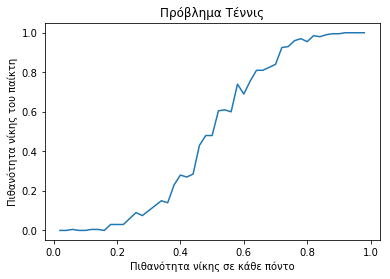

In [4]:
# Let's plot (x,y)
plt.figure()
plt.plot(x, y)
# Specify some extra attributes
plt.xlabel('Πιθανότητα νίκης σε κάθε πόντο')
plt.ylabel('Πιθανότητα νίκης του παίκτη')
plt.title('Πρόβλημα Τέννις')

Βλέπουμε ότι επειδή έχουμε πάρει πολύ μικρό πλήθος δειγμάτων, η σιγμοειδής γραφική παράσταση θέλει γυαλόχαρτο (Μεγαλύτερο πλήθος δειγμάτων). Ακολουθεί βελτιωμένος κώδιξ. Για την ακρίβεια, θα λάβουμε πλήθος δείγματος $N=40.000$, για το οποίο είδαμε στο προηγούμενο εργαστήριο ότι ελαχιστοποιείται η διακύμανση στις 50 εκτιμήσεις.

## Παραδοτέο 1

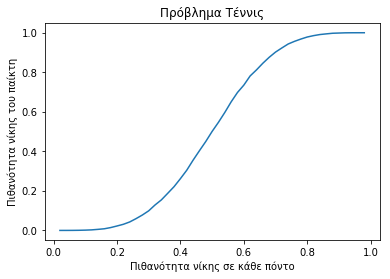

In [5]:
# Create a list of real numbers from start to end by step
start, end, step = 0.02, 1, 0.02
x = np.arange(start, end, step)  # x = [0.02, 0.04, ..., 0.96, 0.98, 1]

y = [] #φτιάχνουμε την κενή λίστα του άξονα y

for i in range(len(x)):    #Γεμίζουμε τη λίστα με append   
    y.append(Monte_Carlo_Tennis(x[i], 40000, 100, 0))    #40.000 δείγματα
    

# Let's plot (x,y)
plt.figure()
plt.plot(x, y)
# Specify some extra attributes
plt.xlabel('Πιθανότητα νίκης σε κάθε πόντο')
plt.ylabel('Πιθανότητα νίκης του παίκτη')
plt.title('Πρόβλημα Τέννις')

Πρακτικά, λαμβάνουμε σιγμοειδή συνάρτηση, διότι, η πιθανότητα της παιχνιδιού εξαρτάται από τον λόγο νίκης του κάθε παίκτη. Οπότε είναι λογικό να συγκλίνει ασυμπτωτικά στο 1, όταν η πιθανότητα του παίκτη που σερβίρει φτάνει κοντά στο 1, και στο 0 όταν φτάνει στο 0, και να είναι σχετικά γραμμική σε κεντρικές τιμές (0.4, 0.6) . Αυτό που έχει ενδιαφέρον, είναι ότι η νίκη του παίκτη συγκλίνει στο 1 αρκετά πριν φτάσει στο 1 η πιθανότητα νίκης του σε κάθε πόντο.

## Άσκηση 87

Σε αυτή την άσκηση θα μελετήσουμε την διακύμανση του χρόνου απορρόφησης μιας αλυσίδας Markov.
Στο παρακάτω κελί δημιουργούμε μια αλυσίδα Markov που ζει στο χώρο καταστάσεων $\mathbb{X} = \{0, 1, 2, 3, 4\}$ με πίνακα πιθανοτήτων μετάβασης

$$
P = 
\begin{pmatrix}
2/5   & 1/2 & 1/10 &  0  & 0 \\
1/3 &  0  &  0  & 2/3 & 0 \\
0   &  0  &  1  &  0  & 0 \\
1/2 &  1/8  &  0  & 1/4 & 1/8 \\
0   &  0  &  0  &  0  & 1 
\end{pmatrix}
$$

και αρχική κατανομή: 

$$ \pi_0 = (1, 0, 0, 0, 0 ) $$

In [6]:
from simple_markov_chain_lib import markov_chain  # import markov chain simulator

# Transition Table
markov_table = {
    0: {1: .5, 2: .5},  # from state 0 we move to state 1 with prob 0.5 and to state 2 with 0.5
    1: {0: 1/3, 3: 2/3},
    2: {2: 1.},
    3: {0: .5, 3: .25, 4: .25},
    4: {4: 1.}
}

# Initial Distribution
init_dist = {0: 1.}  # we start from state 0 with probability 1

mc = markov_chain(markov_table, init_dist)

Προφανώς οι καταστάσεις `2` και `4` είναι "απορροφητικές". 
Μπορούμε να χρησιμοποιήσουμε την αλύσίδα `mc` για να εκτιμήσουμε τον χρόνο απορρόφησης της αλυσίδας.

Για να το κάνουμε αυτό θα τρέξουμε την αλυσίδα $Ν$ φορές. Η εκτιμήτρια Monte Carlo $E_N$ του χρόνου απορρόφησης είναι ο μέσος όρος των χρόνων απορρόφησης σε αυτά τα $N$ δείγματα.

In [7]:
sample_size = 2 ** 5  # Ν
running_total = 0

for i in range(sample_size):
    mc.start()
    while mc.running_state != 2 and mc.running_state != 4:
        mc.move()
    running_total += mc.steps  # steps it took to be absorbed

mc_estimate = running_total / sample_size
print("The estimated absorption time is %.2f steps" % mc_estimate)

The estimated absorption time is 5.38 steps


Έχουμε υπόψιν ότι η εκτιμήτρια $E_N$ είναι μια τυχαία μεταβλητή. Σκοπός αυτής της άσκησης είναι να βρούμε υπολογιστικά πώς επηρεάζεται η διασπορά της $E_N$ από το πλήθος των επαναλήψεων $N$. Το πώς υπολογίζουμε τη δειγματική διασπορά $Μ$ παρατηρήσεων το έχουμε δει στο προηγούμενο εργαστήριο. Περιμένουμε ότι όσο το $N$ μεγαλώνει η διασπορά της $E_N$ πέφτει, αλλά θέλουμε να καταλάβουμε αυτή τη σχέση ποσοτικά.

Για να το κάνουμε αυτό πρέπει να επαναλάβουμε την παραπάνω διαδικασία $M = 30$ φορές ώστε να πάρουμε $M$ δείγματα της τυχαίας μεταβλητής $E_N$ από τα οποία θα εκτιμήσουμε τη διασπορά της. Στη συνέχεια θα επαναλάβουμε τη διαδικασία  για διαφορετικά $N$ και θα προσπαθήσουμε να κατανοήσουμε πώς αλλάζει η διασπορά της $E_N$ με το $N$. 

## Παραδοτέο 2

Υπολογίστε την διασπορά της εκτιμήτριας $E_N$ για $N$ (`sample_size`) $2^5, \dots, 2^{12}$ και φτιάξτε το γράφημα της συνάρτησης $Var(E_N)$ σε κανονική και σε λογαριθμική κλίμακα. Γράψτε τον κώδικά σας στο Jupyter notebook που ανοίξατε για το Παραδοτέο 1 και τρέξτε τον κώδικα ώστε να φαίνονται οι γραφικές παραστάσεις. Αν εμφανίζεται κάπου μια ευθεία, εκτιμήστε την κλίση της. Στη συνέχεια, σε ένα κελί κειμένου εξηγήστε γιατί θα περιμέναμε αυτό το αποτέλεσμα από τη θεωρία.

Αρχικά φτιάχνουμε μία def Monte_Carlo, ώστε να παραμετροποιήσουμε το Sample_Size

In [8]:
def Monte_Carlo(sample_size): 
    running_total = 0

    for i in range(sample_size):
        mc.start()
        while mc.running_state != 2 and mc.running_state != 4:
            mc.move()
        running_total += mc.steps  # steps it took to be absorbed

    mc_estimate = running_total / sample_size
    return mc_estimate

Στη συνέχεια εισάγουμε τις βιβλιοθήκες statistics και φτιάχνουμε μια def για να παράγουμε την διασπορά 30 επαναλήψεων του MonteCarlo, με είσοδο το sample_size. 

In [9]:
import statistics as stat    ## import the library statistics. We will use it to compute the mean and variance of our list

def Var(sample_size):
    estimates=[]                                    ## create the empty list estimates.
    for i in range(30):                             ## in each of 30 runs generate a Monte carlo phat 
        estimates.append( Monte_Carlo(sample_size)) ## and append it to the list estimates
    return stat.variance(estimates)                 ## return the variance

Στη συνέχεια, θα φτιάξουμε τις λίστες που ανιστοιχούν στους άξονες $x$ και $y$, αντίστοιχα.



In [10]:
# Create a list of real numbers from start to end by step
start, end, step = 5, 12, 1
x_temp = np.arange(start, end, step) # φτιάχνουμε πρώτα μία μεταβατική λίστα γιατί δεν ξέρουμε πάηθον

x = 2 ** x_temp #Γεμίζουμε την λίστα x

y = [] #φτιάχνουμε την κενή λίστα του άξονα y

for i in range(len(x)):    #Γεμίζουμε τη λίστα με append   
    y.append(Var(x[i])) 

Και στη συνέχεια, θα φτιάξουμε τις ζωγραφίτσες. 

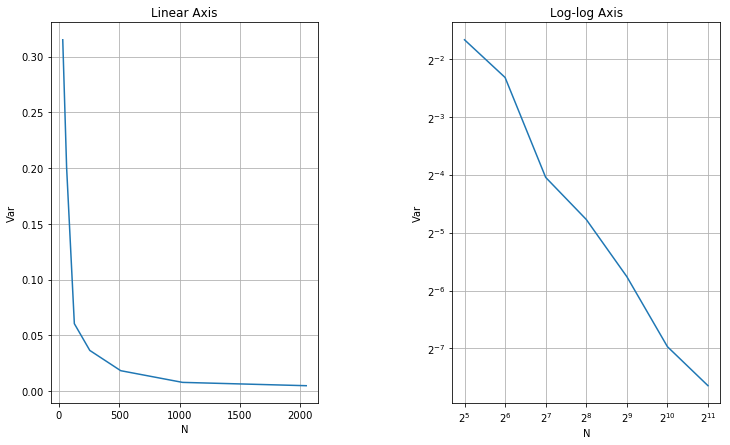

In [12]:
plt.figure(figsize=(12, 7))  # define figure size

# Right Axes
plt.subplot(1, 2, 1)  # setup subplots 1-row, 2-cols, select the 1st
plt.plot(x, y)
plt.xlabel('Ν')
plt.ylabel('Var')
plt.title('Linear Axis')
plt.grid(True)  # add grid-lines

# Left Axes
plt.subplot(1, 2, 2) # select the 2nd subplot
plt.loglog(x, y, basex=2, basey=2)
plt.xlabel('N')
plt.ylabel('Var')
plt.title('Log-log Axis')
plt.grid(True)

plt.subplots_adjust(wspace = 0.5)  # specify the width space

Παρατηρούμε ότι στο λογαριθμικό διάγραμμα λαμβάνουμε σχεδόν ευθεία. Άρα, μιας και δεν έχουμε ζωή, ας υπολογίσουμε προσεγγιστικά με τη μέθοδο ελαχίστων τετραγώνων την κλίση της.

In [15]:
# Λογαριθμίζουμε x, y προς υπολογισμό της κλίσης.
newx = np.log2(x)
newy = np.log2(y)

np.polyfit(newx, newy, 1)

array([-1.03414165,  3.53347599])

Άρα η κλίση της ευθείας είνα περίπου $-1$. Δηλαδή, βλέπουμε ότι όσο αυξάνεται το δείγμα, τόσο μειώνεται η διασπορά των εκτιμητριών. Αυτό φυσικά συνάδει με την θεωρία, αφού είναι το ζουμί του νόμου των μεγάλων αριθμών, πράγμα το οποίο είδαμε μόλις πειραματικά. 